In [3]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [7]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

Pregunta 1 - Extracción de datos de acciones de Tesla utilizando yfinance


In [6]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Get the HTML content and parse it with BeautifulSoup
response = requests.get(url)
html_data = response.content
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables and identify the relevant table
tables = soup.find_all('table')
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table
        break

# Initialize an empty list to store data
data = []

# Loop through rows in the relevant table and extract data
for row in relevant_table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean revenue data
    data.append({"Date": date, "Revenue": revenue})

# Create DataFrame
tesla_revenue = pd.DataFrame(data)

# Step 1: Convert 'Revenue' column to numeric, setting errors='coerce' to handle non-numeric values
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Step 2: Drop rows where 'Revenue' is NaN
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

# Display the cleaned DataFrame
print(tesla_revenue.tail(5))


          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


Pregunta 3 - Extracción de datos de acciones de GameStop utilizando yfinance

In [10]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)
html_data_2 = response_2.text
soup = BeautifulSoup(html_data_2, 'html.parser') # Use html_data_2 instead of html_data
tables = soup.find_all('table')
relevant_table = None
for table in tables:
    # The table title is "GameStop Quarterly Revenue", not "Gme Quarterly Revenue"
    if "GameStop Quarterly Revenue" in table.text:
        relevant_table = table
        break

# Check if relevant_table was found; if not, print a message and exit
if relevant_table is None:
    print("Could not find the relevant table.")
else:
    # Initialize an empty list to store data
    data = []

    # Loop through rows in the relevant table and extract data
    for row in relevant_table.find_all('tr')[1:]:  # Skip header row
        cols = row.find_all('td')
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Clean revenue data
        data.append({"Date": date, "Revenue": revenue})

    # Create DataFrame
    gme_revenue = pd.DataFrame(data)

    # Step 1: Convert 'Revenue' column to numeric, setting errors='coerce' to handle non-numeric values
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

    # Step 2: Drop rows where 'Revenue' is NaN
    gme_revenue.dropna(subset=['Revenue'], inplace=True)

    # Display the cleaned DataFrame
    print(gme_revenue.tail(5))

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


Pregunta 5 - Tablero de acciones e ingresos de Tesla

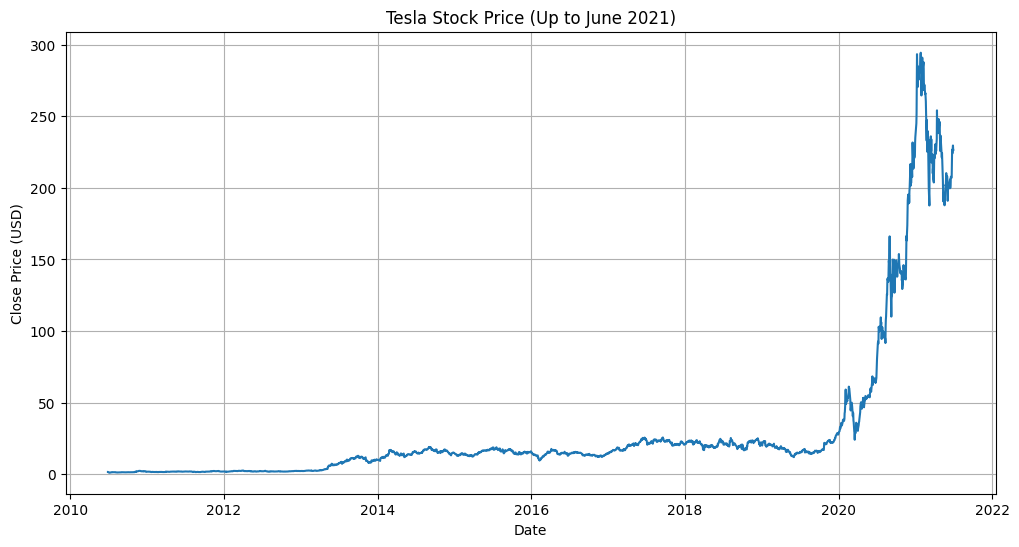

In [54]:
import matplotlib.pyplot as plt

def make_graph(tesla_data):
  """
  Graphs the Tesla stock data.

  Args:
    tesla_data: A Pandas DataFrame containing Tesla's stock data.
  """
  tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
  tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']

  plt.figure(figsize=(12, 6))
  plt.plot(tesla_data['Date'], tesla_data['Close'])
  plt.xlabel('Date')
  plt.ylabel('Close Price (USD)')
  plt.title('Tesla Stock Price (Up to June 2021)')
  plt.grid(True)
  plt.show()

make_graph(tesla_data)

Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop

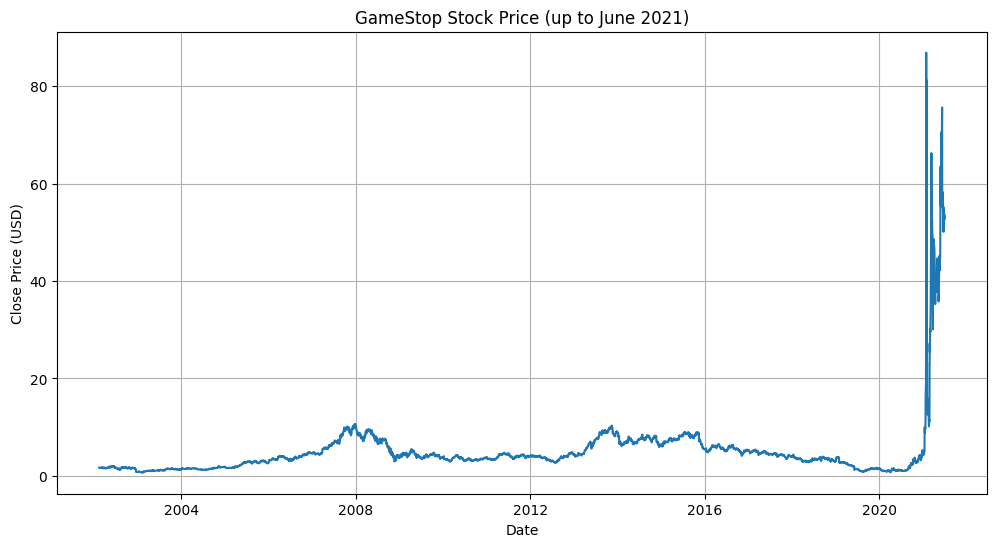

In [57]:

def make_graph(stock_data, revenue_data, title):
  """
  Graphs the stock data and revenue data.

  Args:
    stock_data: A Pandas DataFrame containing stock data.
    revenue_data: A Pandas DataFrame containing revenue data.
    title: The title of the graph.
  """
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
  stock_data = stock_data[stock_data['Date'] <= '2021-06-30']

  plt.figure(figsize=(12, 6))
  plt.plot(stock_data['Date'], stock_data['Close'])
  plt.xlabel('Date')
  plt.ylabel('Close Price (USD)')
  plt.title(f'{title} Stock Price (up to June 2021)')
  plt.grid(True)
  plt.show()


make_graph(gamestop_data, gme_revenue, 'GameStop')